<a href="https://colab.research.google.com/github/cylyu/ist718-project/blob/main/Colab_Data_Loading_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example Project Notebook

## SB718

There are only 2 accepted ways to load data for your project, from a cloud service or Google drive.  If you load data from a cloud service like github, you don't have to follow this format. Keep in mind that the graders do not expect to have to perform any manual steps to load your data from a cloud service.  If we don't see these cells at the start of your notebook, we will assume you are loading your data from a cloud service.<br>
If you are loading data through Google drive, the following cells must be at the start of your notebook.  The naming scheme that we are requiring teams to use will allow us to run your code without having to modify your code.

In [59]:
# The first code cell of your notebook shall include all needed imports to run your project code.  Note that
# there can be markdown cells above this cell.
import pandas as pd

In [60]:
# All data files shall be located in the following directory on 
# your google drive: /content/drive/My Drive/ist718_data/data_groupN

# The following provides 2 example file names and their full path names.  This example assumes the assigned
# group name is group12.  The definitions in this cell must be used to load all data files.
# This is only an example, change these definitions to match your file names.
car_data_csv = '/content/drive/My Drive/ist718_data/data_group12/car_data.csv'
engine_data_csv = '/content/drive/My Drive/ist718_data/data_group12/engine_data.csv'

In [61]:
# The third code cell of your notebook must contain code to mount your google drive and load the data files
from google.colab import drive
drive.mount('/content/drive')

# You must use the definitions above to load your data.
car_df = pd.read_csv(car_data_csv)
engine_df = pd.read_csv(engine_data_csv)

KeyboardInterrupt: ignored

In [ ]:
# Other code or markdown cells follow ...


In [ ]:
! git clone https://github.com/cylyu/ist718-project.git

In [ ]:
! ls

## nb 718

In [2]:
%%bash
pip install pyspark
# Download tweets.csv from github
# If the tweets.csv file does not exist in the colab environment
if [[ ! -f ./quotes_by_char.csv ]]; then 
   # download tweets.csv file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/cylyu/ist718-project/main/nyc-rolling-sales.csv   
fi

# vefify tweets.csv exits in the colab env - should not print an error message
ls nyc-rolling-sales.csv

  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=52264abfdefba2c239f12a7f546ae8cc6082ddc19d9698381a7777fc3f096b35
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
nyc-rolling-sales.csv


--2020-11-28 06:27:49--  https://raw.githubusercontent.com/cylyu/ist718-project/main/nyc-rolling-sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13625843 (13M) [text/plain]
Saving to: ‘nyc-rolling-sales.csv’

     0K .......... .......... .......... .......... ..........  0% 4.04M 3s
    50K .......... .......... .......... .......... ..........  0% 9.22M 2s
   100K .......... .......... .......... .......... ..........  1% 5.02M 2s
   150K .......... .......... .......... .......... ..........  1% 19.1M 2s
   200K .......... .......... .......... .......... ..........  1% 6.47M 2s
   250K .......... .......... .......... .......... ..........  2% 33.4M 2s
   300K .......... .......... .......... .......... ..........  2% 27.2M 1s
   350K .......... ...

In [25]:
from pyspark.ml import feature
from pyspark.ml import clustering
from pyspark.ml import Pipeline
from pyspark.sql import functions as fn
from pyspark.sql import types
from pyspark.sql.functions import *
from pyspark.sql.functions import from_utc_timestamp
from pyspark.sql import SQLContext
from pyspark.sql.functions import col,lower
import numpy as np
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.sql import functions as fn, Row
import matplotlib.pyplot as plt
from pyspark.ml.feature import StandardScaler,PCA,OneHotEncoder
from pyspark.sql.functions import concat, concat_ws
import pandas as pd
from pyspark.sql.types import DoubleType,IntegerType,TimestampType,DateType, StringType
spark = SparkSession.builder.master("local[*]").config("spark.memory.fraction", 0.8).config("spark.executor.memory", "12g").config("spark.driver.memory", "12g").config("spark.memory.offHeap.enabled",'true').config("spark.memory.offHeap.size","12g").getOrCreate()
sparkContext=spark.sparkContext
from pyspark.sql.functions import year, month, dayofmonth

In [4]:
nyc_rolling_sales_df = spark.read.csv("nyc-rolling-sales.csv", header=True, inferSchema=True)

In [5]:
nyc_rolling_sales_df

DataFrame[_c0: int, BOROUGH: int, NEIGHBORHOOD: string, BUILDING CLASS CATEGORY: string, TAX CLASS AT PRESENT: string, BLOCK: int, LOT: int, EASE-MENT: string, BUILDING CLASS AT PRESENT: string, ADDRESS: string, APARTMENT NUMBER: string, ZIP CODE: int, RESIDENTIAL UNITS: int, COMMERCIAL UNITS: int, TOTAL UNITS: int, LAND SQUARE FEET: string, GROSS SQUARE FEET: string, YEAR BUILT: int, TAX CLASS AT TIME OF SALE: int, BUILDING CLASS AT TIME OF SALE: string, SALE PRICE: string, SALE DATE: string]

## clyu

In [52]:
df3=nyc_rolling_sales_df.withColumnRenamed('APARTMENT NUMBER','apartment_number').withColumnRenamed('SALE PRICE','sale_price').\
withColumnRenamed('SALE DATE','sale_date').\
withColumnRenamed('BUILDING CLASS AT TIME OF SALE','building_class_at_sale').\
withColumnRenamed('ZIP CODE','zipcode').\
withColumnRenamed('GROSS SQUARE FEET','gross_square_feet').\
withColumnRenamed('LAND SQUARE FEET','land_square_feet').\
withColumnRenamed('BOROUGH','borough').\
withColumn('borough',fn.when(fn.col('borough')==1,'Manhatten').\
                                                     when(fn.col('borough')==2,'Bronx').\
                                                     when(fn.col('borough')==3,'Brooklyn').\
                                                     when(fn.col('borough')==4,'Queens').\
                                                     when(fn.col('borough')==5,'Staten Island').\
                                                     otherwise(fn.col("borough")))


df3=df3.filter(df3.sale_price != ' -  ').\
                     filter(df3.land_square_feet != ' -  ').\
                     filter(df3.gross_square_feet != ' -  ').\
                     withColumn("sale_price",df3["sale_price"].cast(IntegerType())).\
                     withColumn("gross_square_feet",df3["gross_square_feet"].cast(IntegerType())).\
                     withColumn("sale_date",df3["sale_date"].cast(DateType())).\
                     withColumn("land_square_feet",df3["land_square_feet"].cast(IntegerType())).\
                     withColumn("price_per_sq_ft", col("sale_price") / col("gross_square_feet"))




date_df=df3.select("sale_date",
    year("sale_date").alias('year'), 
    month("sale_date").alias('month'), 
    dayofmonth("sale_date").alias('day')
).\
withColumn('month',fn.when(fn.col('month')==1,'Jan').\
                                                     when(fn.col('month')==2,'Fed').\
                                                     when(fn.col('month')==3,'Mar').\
                                                     when(fn.col('month')==4,'Apr').\
                                                     when(fn.col('month')==5,'Mar').\
                                                     when(fn.col('month')==6,'Jun').\
                                                     when(fn.col('month')==7,'Jul').\
                                                     when(fn.col('month')==8,'Aug').\
                                                     when(fn.col('month')==9,'Sep').\
                                                     when(fn.col('month')==10,'Oct').\
                                                     when(fn.col('month')==11,'Nov').\
                                                     when(fn.col('month')==12,'Dec').\
                                                     otherwise(fn.col("month")))

nyc_rolling_sales_date_df=nyc_rolling_sales_df.join(date_df,nyc_rolling_sales_df.sale_date == date_df.sale_date, how="left")
nyc_rolling_sales_pd=nyc_rolling_sales_df.toPandas()

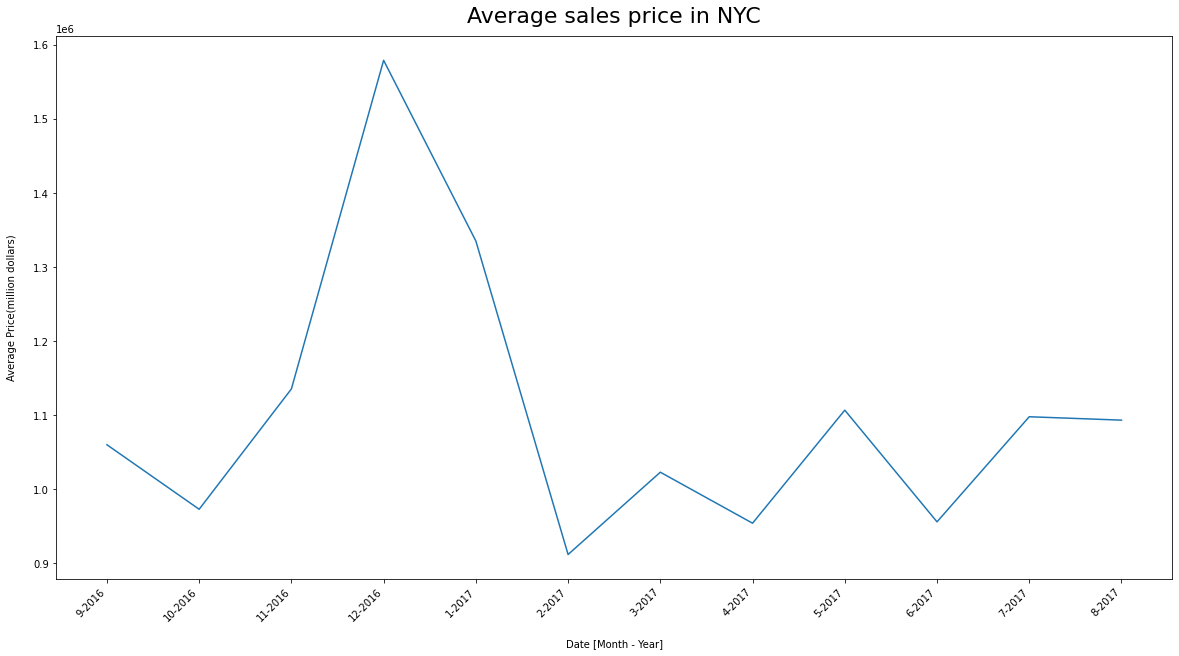

In [53]:

date_df=nyc_rolling_sales_df.select("sale_date",
                                    "sale_price",
    year("sale_date").alias('year'), 
    month("sale_date").alias('month'), 
    dayofmonth("sale_date").alias('day')
)
# .\
# withColumn('month',fn.when(fn.col('month')==1,'Jan').\
#                                                      when(fn.col('month')==2,'Fed').\
#                                                      when(fn.col('month')==3,'Mar').\
#                                                      when(fn.col('month')==4,'Apr').\
#                                                      when(fn.col('month')==5,'Mar').\
#                                                      when(fn.col('month')==6,'Jun').\
#                                                      when(fn.col('month')==7,'Jul').\
#                                                      when(fn.col('month')==8,'Aug').\
#                                                      when(fn.col('month')==9,'Sep').\
#                                                      when(fn.col('month')==10,'Oct').\
#                                                      when(fn.col('month')==11,'Nov').\
#                                                      when(fn.col('month')==12,'Dec').\
#                                                      otherwise(fn.col("month")))
                                                
b=date_df.groupBy('month','year').avg('sale_price')
b=b.withColumn("month_year", concat_ws("-",  b.month,b.year))
b_pd=b.toPandas().sort_values(['year', 'month'], ascending=[True, True])
names = b_pd['month_year']
values =b_pd['avg(sale_price)']

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(names, values)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.ylabel("Average Price(million dollars)", labelpad=16)

plt.xlabel("Date [Month - Year]", labelpad=16)
plt.title("Average sales price in NYC", y=1.013, fontsize=22)
plt.show()


# b_pd.set_index('month_year')['avg(sale_price)'].plot(kind='line',
#                                                                                 figsize=(19, 10),
#                                                                                  color='cadetblue',
#                                                                                 rot=45)
# plt.title("Historical Count of Passengers Per Month", y=1.013, fontsize=22)
# axes= plt.axes()


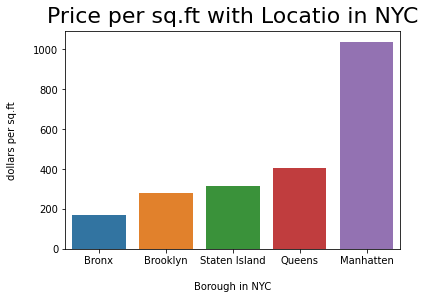

In [56]:

borough_data=nyc_rolling_sales_date_df.groupby('borough').avg('price_per_sq_ft').toPandas().sort_values('avg(price_per_sq_ft)')
sns.barplot(x = 'borough',
            y='avg(price_per_sq_ft)',
              data=borough_data
)
plt.ylabel("dollars per sq.ft", labelpad=16)

plt.xlabel("Borough in NYC", labelpad=16)
plt.title("Price per sq.ft with Locatio in NYC", y=1.013, fontsize=22)
plt.show()

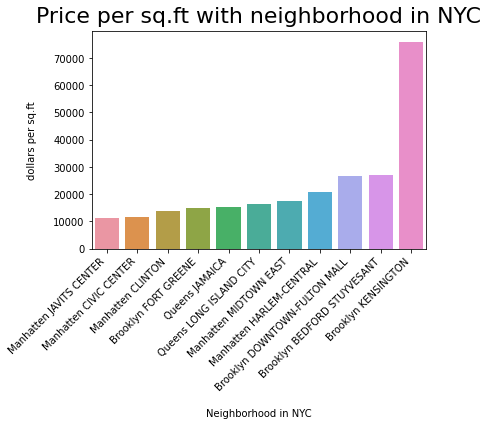

In [58]:
neighborhood_data=nyc_rolling_sales_date_df.filter(nyc_rolling_sales_df.price_per_sq_ft >=10000).\
                                            groupby('NEIGHBORHOOD','borough').avg('price_per_sq_ft')
neighborhood_pd=neighborhood_data.withColumn("neigbor", concat_ws(" ",  neighborhood_data.borough,neighborhood_data.NEIGHBORHOOD)).\
                                  toPandas().sort_values('avg(price_per_sq_ft)')
sns.barplot(x = 'neigbor',
            y='avg(price_per_sq_ft)',
              data=neighborhood_pd
)
plt.ylabel("dollars per sq.ft", labelpad=16)

plt.xlabel("Neighborhood in NYC", labelpad=16)
plt.title("Price per sq.ft with neighborhood in NYC", y=1.013, fontsize=22)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

## zhu

In [39]:
nyc_sales_df=nyc_rolling_sales_df
nyc_pd = nyc_sales_df.toPandas()
nyc_pd['BUILDING CLASS AT TIME OF SALE'].unique()
print(len(nyc_pd['BUILDING CLASS AT TIME OF SALE'].unique()))
nyc_pd['BUILDING CLASS AT TIME OF SALE'].unique()

166


array(['C2', 'C7', 'C4', 'D5', 'D9', 'D7', 'D1', 'C6', 'D0', 'D4', 'RR',
       'R2', 'R4', 'S3', 'S4', 'S5', 'R1', 'R8', 'R9', 'K4', 'M9', 'M3',
       'RA', 'RK', 'RS', 'A9', 'A4', 'B3', 'B1', 'S2', 'C0', 'R6', 'C5',
       'C3', 'C1', 'D6', 'S9', 'O2', 'O1', 'O3', 'O5', 'O6', 'K1', 'K2',
       'L9', 'L8', 'L1', 'H1', 'H8', 'H3', 'R5', 'G9', 'G6', 'P7', 'M1',
       'N2', 'RB', 'RG', 'RT', 'K9', 'V1', 'GW', 'G2', 'I7', 'M4', 'Z9',
       'B9', 'D3', 'I9', 'U6', 'O4', 'L3', 'H2', 'E1', 'Z3', 'Q1', 'RW',
       'C9', 'J5', 'N9', 'S1', 'A5', 'J8', 'B2', 'C8', 'F5', 'G7', 'G5',
       'G4', 'P2', 'Q9', 'Y1', 'RP', 'O8', 'HR', 'G1', 'E7', 'I5', 'R3',
       'I4', 'H9', 'RH', 'D8', 'HB', 'J4', 'W2', 'P9', 'A7', 'D2', 'S0',
       'O7', 'O9', 'W3', 'HS', 'H6', 'J9', 'R0', 'HH', 'W8', 'W6', 'A1',
       'K5', 'F1', 'V9', 'A2', 'V0', 'G0', 'F4', 'E9', 'I3', 'W4', 'V3',
       'I1', 'A6', 'Q8', 'A3', 'Z0', 'W1', 'U1', 'F2', 'F9', 'GU', 'I6',
       'G8', 'P5', 'Y3', 'W9', 'M2', 'G3', 'V6', 'K

In [41]:
plt_df = nyc_sales_df.groupby('BUILDING CLASS AT TIME OF SALE').agg(avg('SALE PRICE'),count("*"))
plt_df.show()

+------------------------------+--------------------+--------+
|BUILDING CLASS AT TIME OF SALE|     avg(SALE PRICE)|count(1)|
+------------------------------+--------------------+--------+
|                            Z9|  2975358.5112781953|     151|
|                            RG|  120983.41301059001|    1120|
|                            C6|    478098.674600078|    2760|
|                            A9|   533994.4361785435|    1414|
|                            H6|             7.535E7|       2|
|                            D5|         2.5389327E7|      24|
|                            D7|2.1996417849056605E7|      66|
|                            R6|          988958.155|     204|
|                            W6|                 0.0|       2|
|                            V3|  16833.333333333332|       9|
|                            F2|           2618750.0|       6|
|                            R8|  2361951.0126582277|      96|
|                            RA|        1.93206434E7|  

Text(0.5, 1.0, 'average sale price of building class')

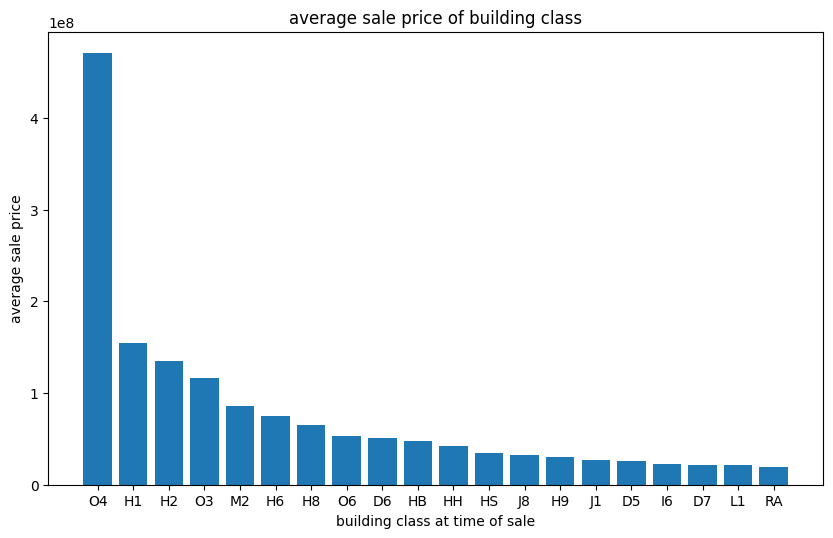

In [46]:

df1 = plt_df.orderBy('avg(SALE PRICE)', ascending = False)
plt1 = df1.toPandas()
plt1_20 = plt1.head(20)
plt.figure(num=None, figsize=(10, 6), dpi = 100)
plt.bar(x = 'BUILDING CLASS AT TIME OF SALE', height = 'avg(SALE PRICE)', data = plt1_20)
plt.ylabel('average sale price')
plt.xlabel('building class at time of sale')
plt.title('average sale price of building class')

Text(0.5, 1.0, 'total number of sold building by building class')

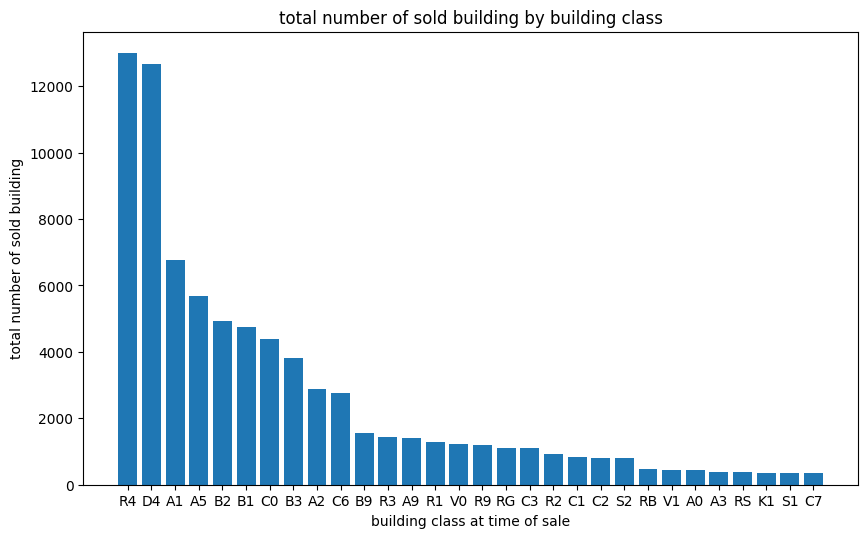

In [47]:
df2 = plt_df.orderBy('count(1)', ascending = False)
plt2 = df2.toPandas()
plt2_30 = plt2.head(30)
plt.figure(num=None, figsize=(10, 6), dpi = 100)
plt.bar(x = 'BUILDING CLASS AT TIME OF SALE', height = 'count(1)', data = plt2_30)
plt.ylabel('total number of sold building')
plt.xlabel('building class at time of sale')
plt.title('total number of sold building by building class')

## LinearRegression

In [19]:
nyc_property_df = nyc_rolling_sales_df.withColumn("LAND SQUARE FEET", nyc_rolling_sales_df["LAND SQUARE FEET"].cast(IntegerType()))
nyc_property_df = nyc_property_df.withColumn("GROSS SQUARE FEET", nyc_property_df["GROSS SQUARE FEET"].cast(IntegerType()))
nyc_property_df = nyc_property_df.withColumn("SALE PRICE", nyc_property_df["SALE PRICE"].cast(IntegerType()))

In [26]:

columns = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE']
nyc_property_df_1 = nyc_property_df.select(columns)

nyc_property_df_1 = nyc_property_df_1.filter(((col('RESIDENTIAL UNITS') > 0) | (col('COMMERCIAL UNITS') > 0)) & \
                                             (col('GROSS SQUARE FEET') > 0) & (col('SALE PRICE') > 50) & \
                                             (col('YEAR BUILT') > 1600) &\
                                             (col('LAND SQUARE FEET') > 100))
nyc_property_df_1 = nyc_property_df_1.withColumn('BUILDING AGE', 2020-col('YEAR BUILT')).drop("YEAR BUILT")

In [28]:
import pyspark.sql.functions as F 
borough_catag = list(nyc_property_df_1.select('BOROUGH').distinct().toPandas()['BOROUGH'])
borough_dummy = [F.when(F.col('BOROUGH') == cata,1).otherwise(0)\
            .alias("BOROUGH_" + str(cata)) for cata in borough_catag]
class_catag = list(nyc_property_df_1.select('BUILDING CLASS CATEGORY').distinct().toPandas()['BUILDING CLASS CATEGORY'])
class_dummy = [F.when(F.col('BUILDING CLASS CATEGORY') == cata,1).otherwise(0)\
            .alias("CLASS_" + str(cata)[:2]) for cata in class_catag]
nyc_property_df_2 = nyc_property_df_1.select(borough_dummy+class_dummy+nyc_property_df_1.columns)
boroughs = nyc_property_df_2.columns[:5]
for i in range(5):
  nyc_property_df_2 = nyc_property_df_2.withColumn(boroughs[i]+"*"+"LAND SQUARE FEET", col(boroughs[i])*col("LAND SQUARE FEET"))
  nyc_property_df_2 = nyc_property_df_2.withColumn(boroughs[i]+"*"+"GROSS SQUARE FEET", col(boroughs[i])*col("GROSS SQUARE FEET"))

In [29]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
nyc_property_train_df, nyc_property_test_df = nyc_property_df_2.randomSplit([0.7, 0.3])

featureCols = nyc_property_df_2.columns
featureCols = [n for n in featureCols if n not in ['BOROUGH','BUILDING CLASS CATEGORY', 'SALE PRICE']]
va = VectorAssembler(inputCols=featureCols, outputCol="features")

lr = LinearRegression(featuresCol = 'features', labelCol='SALE PRICE')

nyc_property_pipe = Pipeline(stages= [va, lr])
nyc_property_model = nyc_property_pipe.fit(nyc_property_train_df)
nyc_property_predictions = nyc_property_model.transform(nyc_property_test_df)
price_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="SALE PRICE", metricName="mse")
price_error = price_evaluator.evaluate(nyc_property_predictions)
print("Mean Squared Error (MSE) on test data = %g" % price_error)

Mean Squared Error (MSE) on test data = 7.31637e+13


(0.0, 100000000.0)

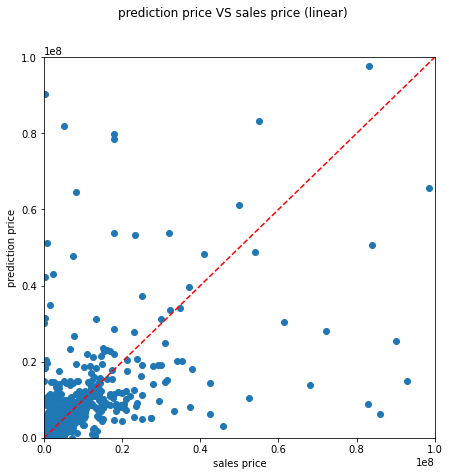

In [30]:
sales_price = list(nyc_property_predictions.select('SALE PRICE').toPandas()['SALE PRICE'])
prediction_price = list(nyc_property_predictions.select('prediction').toPandas()['prediction'])
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
ax.plot([0, 100000000], [0, 100000000], 'r--')
ax.scatter(sales_price,prediction_price)

fig.suptitle("prediction price VS sales price (linear)")
ax.set_xlabel("sales price")
ax.set_ylabel("prediction price")
plt.xlim(0, 100000000)
plt.ylim(0, 100000000)

## Random forest






































In [33]:
featureCols_del = ['BOROUGH', 'BUILDING CLASS CATEGORY'] + nyc_property_train_df.columns[-10:]
featureCols_2 = [n for n in featureCols if n not in featureCols_del]
featureCols_3 = featureCols_2 + ['SALE PRICE']
nyc_property_train_df_1 = nyc_property_train_df.select(featureCols_3)
nyc_property_test_df_1 = nyc_property_test_df.select(featureCols_3)
va_1 = VectorAssembler(inputCols=featureCols_2, outputCol="features")
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

rfr = RandomForestRegressor(labelCol="SALE PRICE", featuresCol="features", maxDepth = 20)
random_pipeline = Pipeline(stages=[va_1, rfr])
random_model = random_pipeline.fit(nyc_property_train_df_1)
random_prediction = random_model.transform(nyc_property_test_df_1)

In [34]:
price_error_1 = price_evaluator.evaluate(random_prediction)
print("Mean Squared Error (MSE) on test data = %g" % price_error_1)

Mean Squared Error (MSE) on test data = 3.33756e+13


(0.0, 100000000.0)

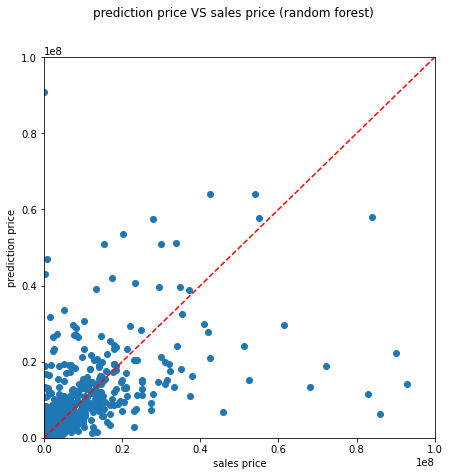

In [35]:
sales_price_1 = list(random_prediction.select('SALE PRICE').toPandas()['SALE PRICE'])
prediction_price_1 = list(random_prediction.select('prediction').toPandas()['prediction'])

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
ax.plot([0, 100000000], [0, 100000000], 'r--')
ax.scatter(sales_price_1,prediction_price_1)

fig.suptitle("prediction price VS sales price (random forest)")
ax.set_xlabel("sales price")
ax.set_ylabel("prediction price")
plt.xlim(0, 100000000)
plt.ylim(0, 100000000)

## GBT MODEL

In [8]:



# preprocessing
df2 = nyc_rolling_sales_df.dropna(thresh=3,subset=('SALE PRICE', 'BUILDING CLASS CATEGORY', 'YEAR BUILT'))
df2 = df2.withColumn('SALE PRICE', translate('SALE PRICE', '-', '0'))
df2=df2.withColumnRenamed('SALE PRICE', 'price')
df2=df2.where("price!=0")
from pyspark.sql.types import FloatType
df2 = df2.withColumn('TOTAL UNITS', df2['TOTAL UNITS'].cast(FloatType()))
df2 = df2.withColumn('LAND SQUARE FEET', df2['LAND SQUARE FEET'].cast(FloatType()))
df2 = df2.withColumn('GROSS SQUARE FEET', df2['GROSS SQUARE FEET'].cast(FloatType()))
df2 = df2.withColumn('YEAR BUILT', df2['YEAR BUILT'].cast(FloatType()))
df2 = df2.withColumn('price', df2['price'].cast(FloatType()))
df2 = df2.dropna(thresh=5,subset=('TOTAL UNITS', 'LAND SQUARE FEET',	'GROSS SQUARE FEET',	'YEAR BUILT', 'price'))

Pipeline

In [12]:
train, test = df2.randomSplit([8.0, 2.0])

va = feature.VectorAssembler(inputCols=['TOTAL UNITS', 'LAND SQUARE FEET',	'GROSS SQUARE FEET',	'YEAR BUILT'], outputCol='features')
gbt = regression.GBTRegressor(featuresCol='features', labelCol='price', maxIter=50, maxDepth=10, seed=42)

pipe = Pipeline(stages=[va, gbt])

model_gbt = pipe.fit(train)
gbt_prediction = model_gbt.transform(test)


In [16]:
evaluator = evaluation.RegressionEvaluator(predictionCol='prediction', labelCol='price', metricName='mae')
evaluator.evaluate(gbt_prediction)

1162240.098897343

In [15]:
df_stats = gbt_prediction.select(
    mean(col('price')).alias('mean')
).collect()
df_stats

[Row(mean=1460918.540472063)]

(0.0, 100000000.0)

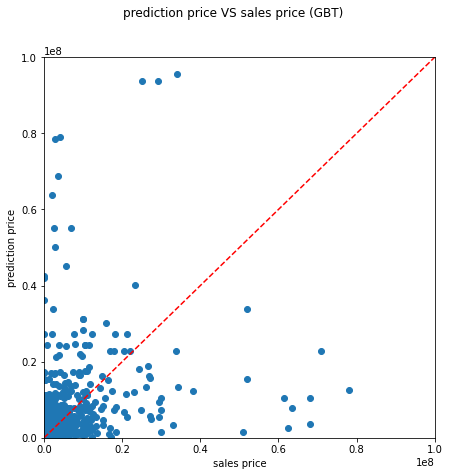

In [17]:
import matplotlib.pyplot as plt

gbt = gbt_prediction.toPandas()

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
ax.plot([0, 100000000], [0, 100000000], 'r--')
ax.scatter(gbt['price'], gbt['prediction'])

fig.suptitle("prediction price VS sales price (GBT)")
ax.set_xlabel("sales price")
ax.set_ylabel("prediction price")
plt.xlim(0, 100000000)
plt.ylim(0, 100000000)